# Preprocessing per classificazione multiclasse su `category`



 Valori mancanti prima del trattamento:
log_finalWorth                            0
age                                      53
selfMade_encoded                       2602
log_gdp_country                         126
cpi_country                             146
life_expectancy_country                 144
gross_tertiary_education_enrollment     144
total_tax_rate_country                  144
population_country                      126
dtype: int64

 Numero di outlier per variabile:
log_finalWorth_outlier                           79
age_outlier                                      59
selfMade_encoded_outlier                       2602
log_gdp_country_outlier                         156
cpi_country_outlier                             615
life_expectancy_country_outlier                 326
gross_tertiary_education_enrollment_outlier     144
total_tax_rate_country_outlier                  148
population_country_outlier                      126
dtype: int64


c:\Users\angel\OneDrive\Desktop\DataMiningProject\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\angel\OneDrive\Desktop\DataMiningProject\.venv\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\angel\OneDrive\Desktop\DataMiningProject\.venv\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)



 Dataset pronto per la classificazione su 'category'. Salvato in '../data/splitted_category/'


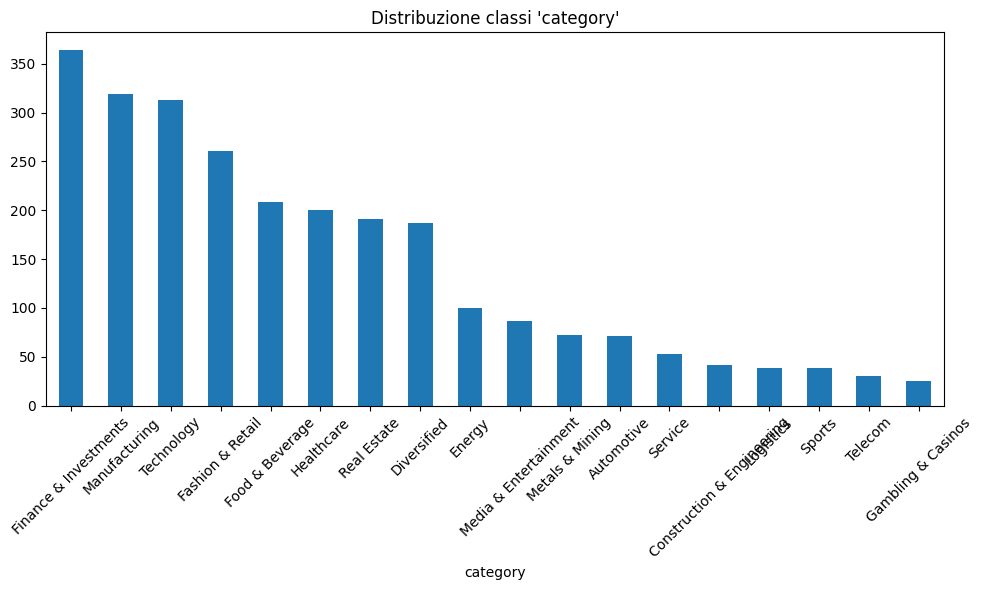

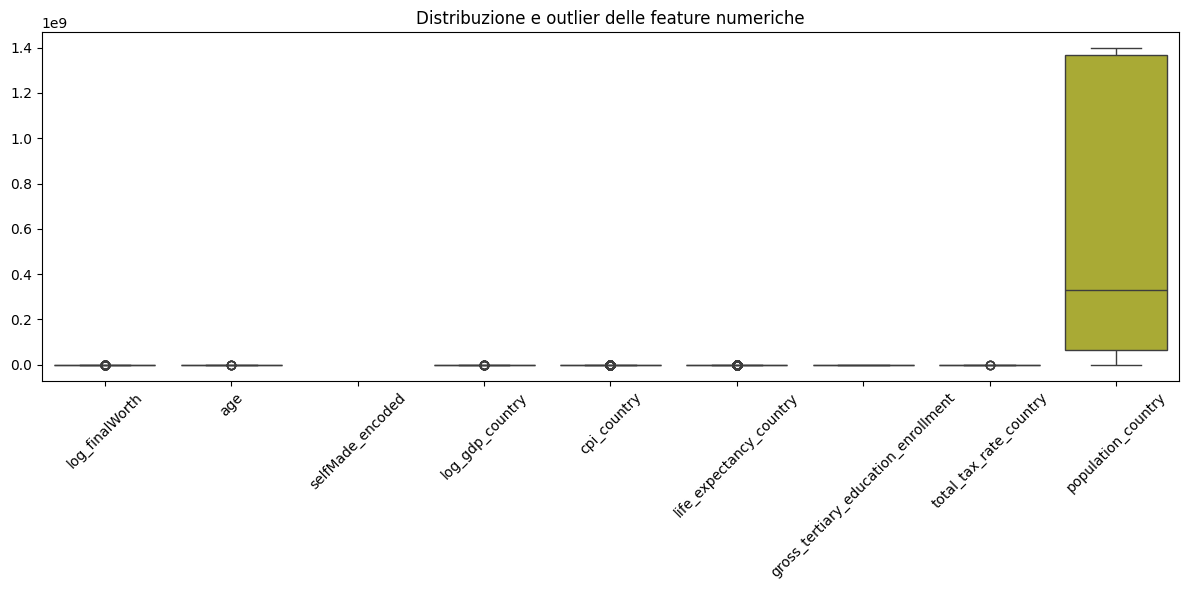

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === 1. Percorsi e Caricamento ===
INPUT_PATH = "../data/raw/Billionaires Statistics Dataset.csv"
OUTPUT_DIR = "../data/splitted_category"
os.makedirs(OUTPUT_DIR, exist_ok=True)

df = pd.read_csv(INPUT_PATH)
df = df.drop_duplicates()

df['gdp_country'] = df['gdp_country'].astype(str).str.replace("$", "", regex=False)
df['gdp_country'] = df['gdp_country'].str.replace(",", "").str.strip()
df['gdp_country'] = pd.to_numeric(df['gdp_country'], errors='coerce')



# === 2. Trasformazioni logaritmiche ===
df["log_finalWorth"] = np.log1p(df["finalWorth"])
df["log_gdp_country"] = np.log1p(df["gdp_country"])
df["selfMade_encoded"] = df["selfMade"].map({"True": 1, "False": 0})

# === 3. Selezione colonne utili ===
numerical_cols = ['selfMade_encoded', 'log_finalWorth', 'age', 'log_gdp_country', 'cpi_country',
                  'life_expectancy_country', 'gross_tertiary_education_enrollment',
                  'total_tax_rate_country', 'population_country']

categorical_cols = ['country', 'industries', 'source', 'gender', 'status']

# === 4. Gestione NaN ===
print("\n Valori mancanti prima del trattamento:")
print(df[numerical_cols].isnull().sum())

for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val)

# === 5. Identificazione outlier (IQR) ===
outlier_mask = pd.DataFrame(index=df.index)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask[col + '_outlier'] = ~df[col].between(lower, upper)

print("\n Numero di outlier per variabile:")
print(outlier_mask.sum())


# === 6. Encoding categoriche ===
categorical_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# === 7. Target ===
target = 'category'
y = df[target]
le = LabelEncoder()
y_encoded = le.fit_transform(y) # trasformo tutte le variabili target in 0,1,2... più facili da gestire per fgli algoritmi di classificazione
joblib.dump(le, "../models/label_encoder_category.joblib")


# === 8. Costruzione dataset finale ===
X = pd.concat([df[numerical_cols], categorical_encoded], axis=1)

# === 9. Rimozione record con target mancante ===
mask = y.notna()
X = X[mask]
y_encoded = y_encoded[mask]

# === 10. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# === 11. Salvataggio ===
X_train.to_csv(os.path.join(OUTPUT_DIR, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(OUTPUT_DIR, "X_test.csv"), index=False)
pd.Series(y_train, name="category_encoded").to_csv(os.path.join(OUTPUT_DIR, "y_train.csv"), index=False)
pd.Series(y_test, name="category_encoded").to_csv(os.path.join(OUTPUT_DIR, "y_test.csv"), index=False)

print("\n Dataset pronto per la classificazione su 'category'. Salvato in '../data/splitted_category/'")

# === 12. Visualizzazione distribuzione categorie ===
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title("Distribuzione classi 'category'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 13. Visualizzazione outlier ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Distribuzione e outlier delle feature numeriche")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [9]:
import pandas as pd

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Stampa
print("📊 Attributi numerici:")
print(numerical_cols)
i=0
for n in numerical_cols:
    i+=1
print(i)    
print("\n🔤 Attributi categorici:")
print(categorical_cols)
j=0
for n in categorical_cols:
    j+=1
print(j)


📊 Attributi numerici:
['rank', 'finalWorth', 'personName', 'age', 'city', 'source', 'organization', 'title', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country', 'selfMade_encoded', 'log_finalWorth', 'log_gdp_country']
25

🔤 Attributi categorici:
['country', 'industries', 'countryOfCitizenship', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'date', 'state', 'residenceStateRegion']
12
